<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/Vehiculos_EDAejercicio15enero2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Vehículos

Analizareos qué tipo de vehículos que más contaminan. Cuidado hay algunos que no emiten, así que de los que emiten saber cuáles son.

In [ ]:
# Librerias

import pandas as pd   # Tratamiento dataframes
import numpy as np # Mates
import matplotlib.pyplot as plt #Gráficas
import seaborn as sns #Gráficas aún más chulas
import scipy # Estadísticas, ciencia

In [ ]:
nombre_fichero = 'Vehiculos-220114-210141.csv'

In [ ]:
cars=pd.read_csv(nombre_fichero)
cars.head(3)

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385


In [ ]:
cars.shape

(38436, 11)

In [ ]:
cars.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
cars.dropna(inplace=True) 
  

In [ ]:
cars.dtypes

make               object
model              object
year                int64
displ             float64
cylinders         float64
trany              object
drive              object
VClass             object
fuelType           object
comb08              int64
co2TailpipeGpm    float64
dtype: object

In [ ]:
# Comprobar cuantos valores NAs hay
cars.isnull().sum()

make                 0
model                0
year                 0
displ              140
cylinders          142
trany               11
drive             1189
VClass               0
fuelType             0
comb08               0
co2TailpipeGpm       0
dtype: int64

In [ ]:
# Limpieza de la BBDD: borrar duplicados y cambio de nombres
# Sería conveniente especificar cuántas filas se han eliminado por duplicadas y
# la causa
cars=cars.drop_duplicates()
cars.dropna()

cars.shape

(36930, 11)

In [ ]:
cars.head(3)

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [ ]:
cars = cars.rename(columns={'co2TailpipeGpm':'co2',
                        'VClass': 'class',
                        'fuelType': 'fuel',
                        'comb08': 'comb'})
cars.sample(3)

,make,model,year,displ,cylinders,trany,drive,class,fuel,comb,co2
12664,Ford,E150 Econoline 2WD,2003,5.4,8.0,Automatic 4-spd,Rear-Wheel Drive,"Vans, Cargo Type",Regular,13,683.615385
8979,Chrysler,Sebring Convertible,2002,2.7,6.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,20,444.350000
35727,Toyota,RAV4 Soft Top 4WD,1998,2.0,4.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Special Purpose Vehicle 4WD,Regular,21,423.190476


In [ ]:
cars["trany"].unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [ ]:
# Miramos los valores únicos de las variables categóricas
cars.describe(include="all")

# Agrupamos trany (transmion)
cars['trany'].unique() # agrupamos en automático y manual
cars['trany_group'] = np.where(cars['trany'].str.contains('Auto'), 'Automatic', 'Manual')

# Agrupamos class de coches
cars['class'].unique() # agrupamos en x categorias
cars['class_group'] = np.where(cars['class'].str.contains(r'|'.join(['Purpose', 'purpose'])), 'Special Purpose Vehicle', 
                        np.where(cars['class'].str.contains(r'|'.join(['Sport', 'sport', 'Two'])), 'Sport Vehicle', 
                        np.where(cars['class'].str.contains(r'|'.join(['Van', 'van'])), 'Van',
                        np.where(cars['class'].str.contains(r'|'.join(['pickup', 'Pickup'])), 'Pickup',
                        np.where(cars['class'].str.contains(r'|'.join(['Compact', 'compact', 'Midsize'])), 'Compact',
                        np.where(cars['class'].str.contains(r'|'.join(['wagon', 'Wagon', 'Large'])), 'Station wagon',
                        cars['class']
                        )
                        )
                        )
                        )
                        )
) 

cars['fuel_group'] = np.where(cars['fuel'].str.contains(r'|'.join(['Electri', 'electri'])), 'Hybrid', 'ICE') 

cars['comb_inv']=1/cars['comb']

cars.sample(5)

,make,model,year,displ,cylinders,trany,drive,class,fuel,comb,co2,trany_group,class_group,fuel_group,comb_inv
32809,Saturn,Outlook AWD,2007,3.6,6.0,Automatic 6-spd,4-Wheel or All-Wheel Drive,Sport Utility Vehicle - 4WD,Regular,18,493.722222,Automatic,Sport Vehicle,ICE,0.055556
13119,Ford,Expedition 2WD,1998,5.4,8.0,Automatic 4-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Automatic,Special Purpose Vehicle,ICE,0.076923
32238,Roush Performance,F150 Pickup 2WD,2017,5.0,8.0,Automatic (S6),Rear-Wheel Drive,Standard Pickup Trucks 2WD,Premium,13,699.000000,Automatic,Pickup,ICE,0.076923
36483,Toyota,Yaris,2015,1.5,4.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,32,278.000000,Automatic,Compact,ICE,0.031250
36720,Volkswagen,GTI,2012,2.0,4.0,Manual 6-spd,Front-Wheel Drive,Compact Cars,Premium,25,355.480000,Manual,Compact,ICE,0.040000


In [ ]:
cars['fuel_group'].value_counts(normalize=True)*100

ICE       99.434064
Hybrid     0.565936
Name: fuel_group, dtype: float64

In [ ]:
# únicamente los datos que presentan emisión de co2 == 0 son los electricos
cars[cars.co2 == 0].shape[0]

139

In [ ]:
# Los eliminamos para simplicar los análisis EDA (esto se hizo antes que el resto)
cars = cars[cars['fuel'] != 'Electricity']

In [ ]:
cars['fuel'].value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuel, dtype: int64

In [ ]:
# Investigamos la variable respuesta co2
cars.describe(include="all").fillna("-")

,make,model,year,displ,cylinders,trany,drive,class,fuel,comb,co2,trany_group,class_group,fuel_group,comb_inv
count,36791,36791,36791.0,36789.0,36788.0,36789,36002,36791,36791,36791.0,36791.0,36791,36791,36791,36791.0
unique,129,3734,-,-,-,37,7,34,13,-,-,2,6,2,-
top,Chevrolet,F150 Pickup 2WD,-,-,-,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,-,-,Automatic,Compact,ICE,-
freq,3673,198,-,-,-,10588,12968,5340,24078,-,-,24937,16525,36721,-
mean,-,-,2000.787421,3.321786,5.746493,-,-,-,-,20.012068,473.185008,-,-,-,0.053134
std,-,-,10.374662,1.359945,1.758009,-,-,-,-,5.109608,118.833905,-,-,-,0.013338
min,-,-,1984.0,0.6,2.0,-,-,-,-,7.0,29.0,-,-,-,0.017241
25%,-,-,1991.0,2.2,4.0,-,-,-,-,17.0,386.391304,-,-,-,0.043478
50%,-,-,2002.0,3.0,6.0,-,-,-,-,19.0,466.0,-,-,-,0.052632
75%,-,-,2010.0,4.3,6.0,-,-,-,-,23.0,555.4375,-,-,-,0.058824


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


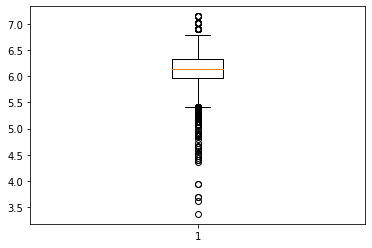

In [ ]:
# Hacemos un histograma para confirmar normalidad
# Ho: normal y mis datos son iguales {p > 0.05}
# H1: normal y mis datos son diferentes {p < 0.05}
# Para esto empleamos el test de Shapiro, investigando si se encuentra en una distribución normal. 
# Si existe normalidad, podemos emplear test paramétricos con los datos. Si no, tests no paramétricos.
# Con los datos normales podemos usar test paramétricos para comprobar hipótesis,
#  p.ej: ¿Es cierto que los consumos de diesel son menores que los de gasolina?

# By groups
# ICE = cars['co2'][cars['fuel_group'] == 'ICE']
# hybrid = cars['co2'][cars['fuel_group'] != 'ICE']
# scipy.stats.shapiro(np.log(hybrid))

scipy.stats.shapiro(cars['co2']) # No me fio p-value = 0!!!!!

# print(scipy.stats.shapiro(np.log(cars['co2'])))

# Si no se cumple normalidad, se puede intentar "suavizar" o "smooth" los datos. Esto no tiene por qué asegurar la normalidad.
# Puedes usar log, exp, sqrt, etc...
# Luego puedes eliminar "outliers" de tus datos. Obviamente esto hay que justificarlo antes de hacerlo. 
plt.boxplot(np.log(cars['co2']))
plt.show()





In [ ]:
cars.corr()
# Observamos relación entre cilindos y cilindrada (displ)
# Cilindrada = n_cilindros*volumen_desplazamiento

# La colinealidad aumenta la redundancia de los datos y reduce la variabilidad.

,year,displ,cylinders,comb,co2,comb_inv
year,1.000000,0.044629,0.085348,0.185469,-0.209626,-0.194433
displ,0.044629,1.000000,0.903060,-0.746641,0.801668,0.790479
cylinders,0.085348,0.903060,1.000000,-0.699767,0.751973,0.747045
comb,0.185469,-0.746641,-0.699767,1.000000,-0.925810,-0.929135
co2,-0.209626,0.801668,0.751973,-0.925810,1.000000,0.994185
comb_inv,-0.194433,0.790479,0.747045,-0.929135,0.994185,1.000000


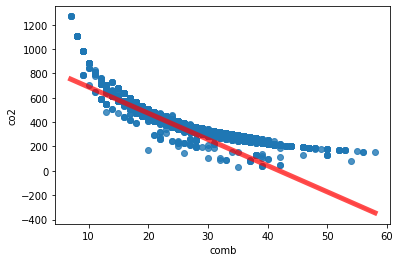

In [ ]:
# Hacemos un boxplot para ver si hay outliers
attributes = [ 'comb']

for i in attributes:
    sns.regplot(x=cars[i], y=cars["co2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.xlabel(i)
    plt.show()

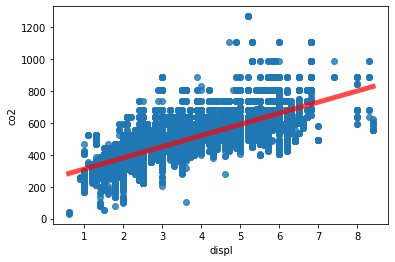

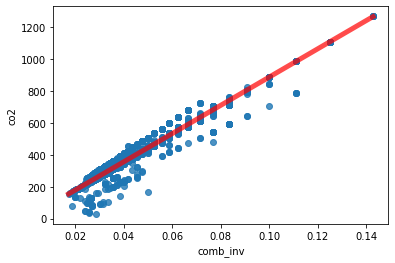

In [ ]:
# Hacemos un boxplot para ver si hay outliers
attributes = ['displ', 'comb_inv']

for i in attributes:
    sns.regplot(x=cars[i], y=cars["co2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.xlabel(i)
    plt.show()

In [ ]:
cars.dtypes

make            object
model           object
year             int64
displ          float64
cylinders      float64
trany           object
drive           object
class           object
fuel            object
comb             int64
co2            float64
trany_group     object
class_group     object
fuel_group      object
comb_inv       float64
dtype: object

In [ ]:
cars.columns

Index(['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive',
       'class', 'fuel', 'comb', 'co2', 'trany_group', 'class_group',
       'fuel_group', 'comb_inv'],
      dtype='object')

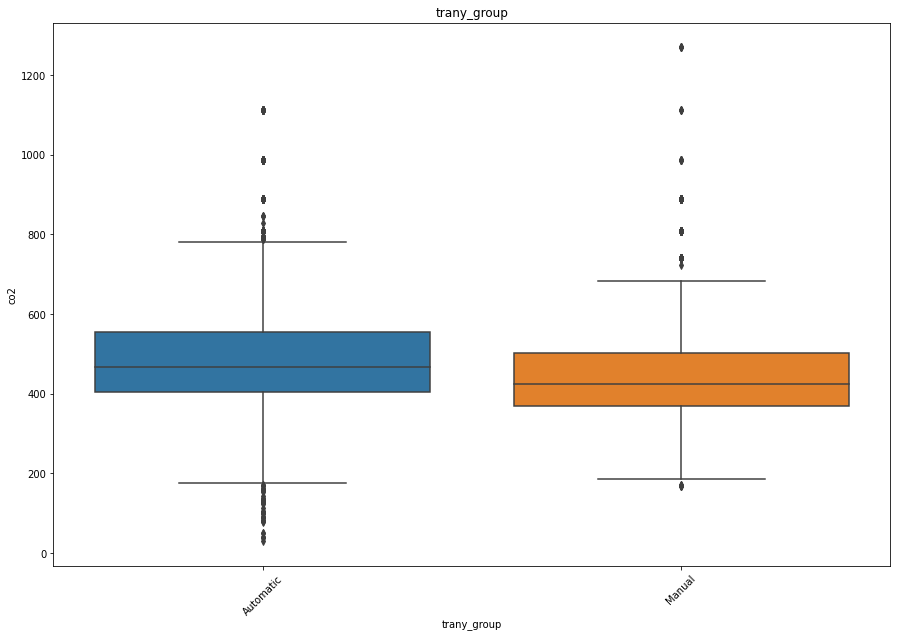

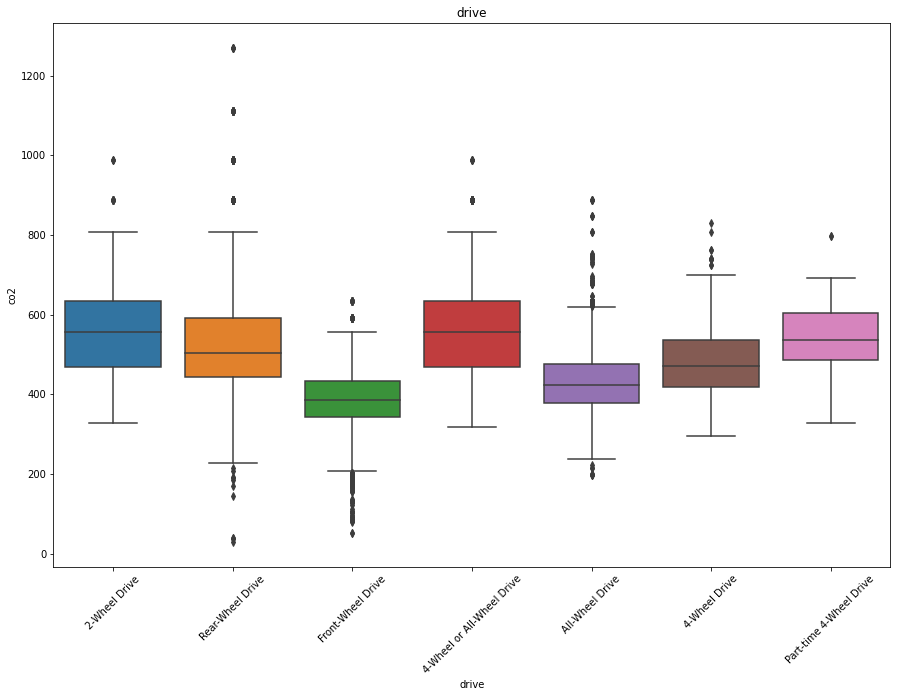

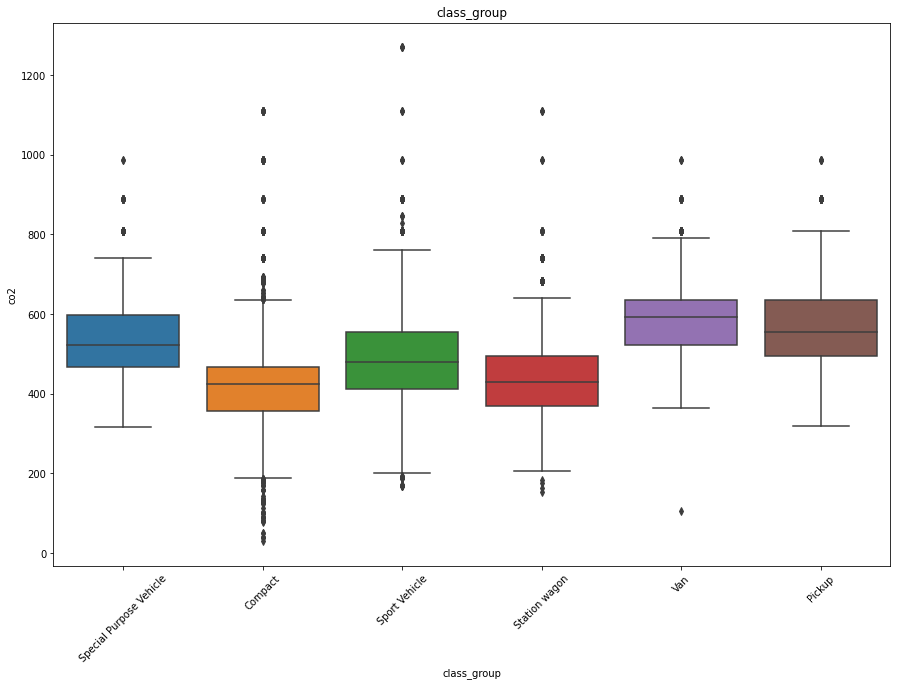

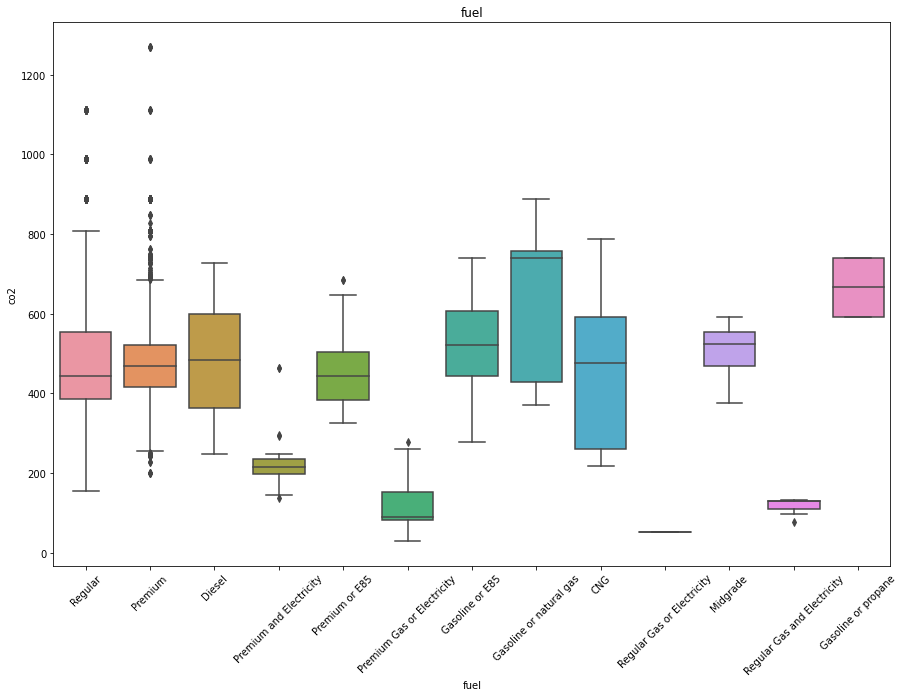

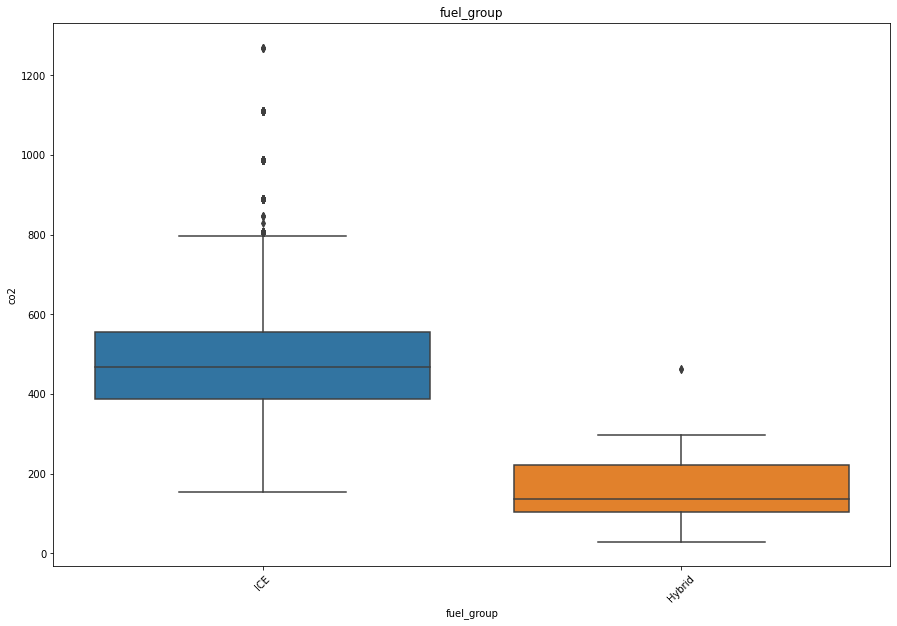

In [ ]:
# sns.pairplot(cars)
# Co2 tiene una relación positiva con displ y cylindres; mientras que con comb tiene un relación negativa
# displ y cylindres están correlacionados positivamente
# comb y displ están correlacionados negativamente
# cylindres y comb están correlacionados negativamente
# A partir del año 2000 no se ven valores de co2 que tienden alza
labels = ['trany_group', 'drive', 'class_group', 'fuel', 'fuel_group']
for i in labels: 
    plt.figure(figsize=(15,10))
    sns.boxplot(x=cars[i], y=cars["co2"] )
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

# make demasiados - agrupar o descartar
# trany demasiados - agrupar o descartar


<Figure size 1440x720 with 0 Axes>

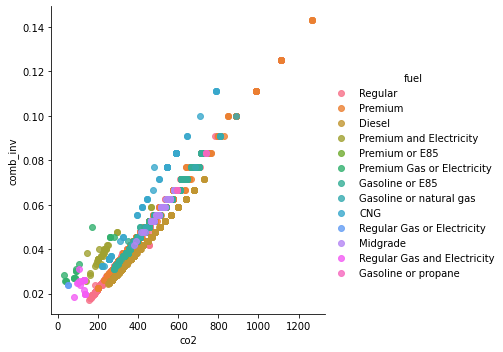

In [ ]:
# Miramos alguna interacción que nos de buena vibra
plt.figure(figsize=(20,10))
sns.lmplot(x="co2", y="comb_inv", data=cars, fit_reg=False, hue='fuel', legend=True)
plt.show()

# sns.lmplot( x="co2", y="displ", data=cars, fit_reg=False, hue='fuel_group', legend=True)
# plt.legend(loc='lower right')
# plt.show()



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# regresión lineal

In [ ]:
cars["displ"].mean()



3.3217864035446585

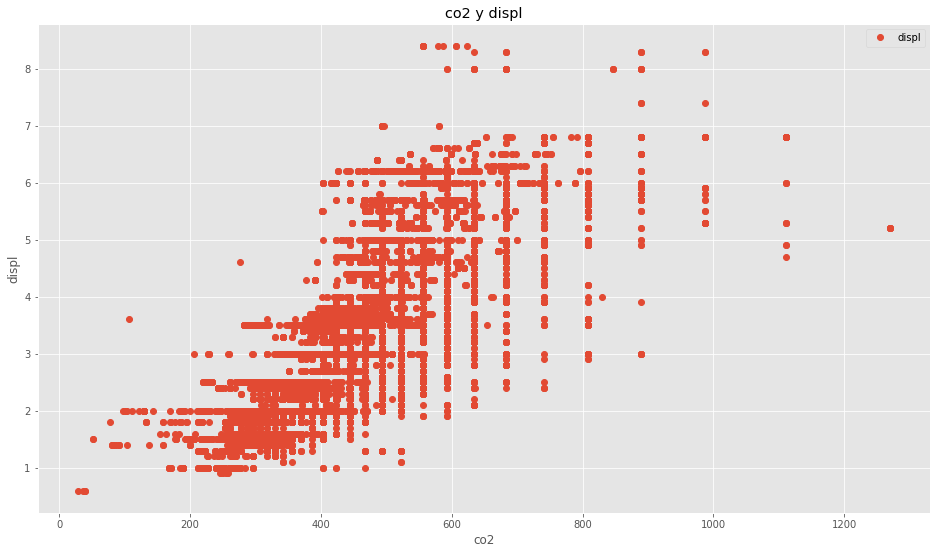

In [ ]:
cars.plot(x="co2", y='displ', style='o')
plt.title("co2 y displ") 
plt.xlabel("co2") 
plt.ylabel("displ") 
plt.show()

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from scipy.stats import pearsonr

In [ ]:
corr_test = pearsonr(x = cars["co2"], y = cars["displ"])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.8026660807243826
P-value:  0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #Entrena el algoritm

ValueError: ignored

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


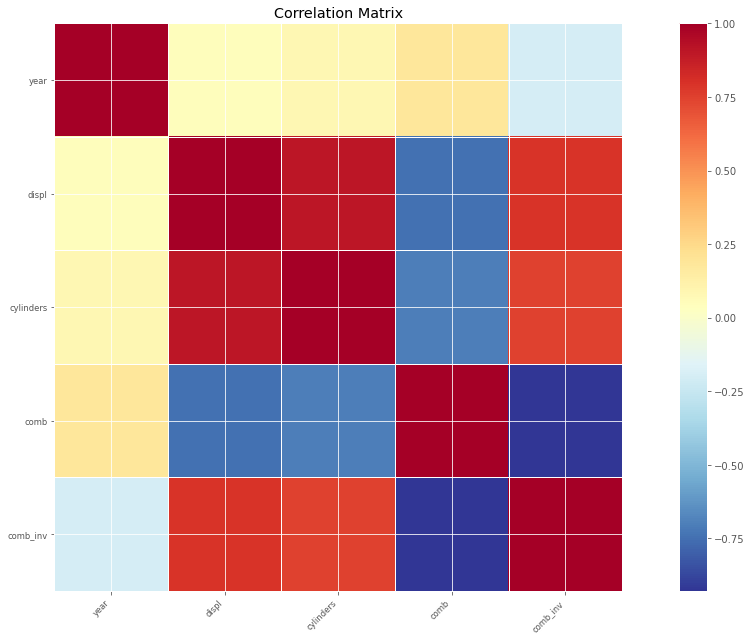

In [ ]:
corr = cars.set_index("co2").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

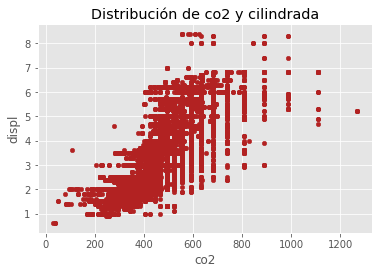

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

cars.plot(
    x    = "co2",
    y    = "displ",
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de co2 y cilindrada');

In [ ]:
X = cars[["co2"]]
y = cars["displ"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-1.02647518]
Coeficiente: [('co2', 0.009204661376403567)]
Coeficiente de determinación R^2: 0.6442654214132715


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[4.42697986]
 [3.78539692]
 [3.65869746]]

El error (rmse) de test es: 0.8058582488516641


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                 5.210e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:24:38   Log-Likelihood:                -34861.
No. Observations:               28797   AIC:                         6.973e+04
Df Residuals:                   28795   BIC:                         6.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0265      0.020    -52.119      0.0

In [ ]:
modelo.conf_int(alpha=0.05)

array([[-1.06507805, -0.98787231],
       [ 0.00912562,  0.0092837 ]])

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.816512,0.008066,4.800702,4.832323,3.224998,6.408027
1,3.785397,0.005177,3.775250,3.795544,2.193929,5.376865
2,3.244488,0.004801,3.235078,3.253897,1.653024,4.835951
3,3.518071,0.004852,3.508561,3.527581,1.926607,5.109535


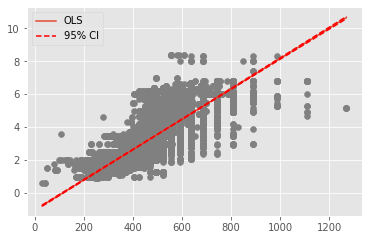

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:

diferenciaco2=cars["co2"].diff()

diferenciaco2.mean()


-0.0073831732937646695

In [ ]:
fabricante=cars.groupby(cars["make"])

fabricante.describe()

year               ...  comb_inv          
                              count         mean  ...       75%       max
make                                              ...                    
AM General                      4.0  1984.500000  ...  0.076923  0.076923
ASC Incorporated                1.0  1987.000000  ...  0.062500  0.062500
Acura                         310.0  2003.864516  ...  0.052632  0.071429
Alfa Romeo                     46.0  1994.630435  ...  0.055556  0.076923
American Motors Corporation    18.0  1984.666667  ...  0.058824  0.062500
...                             ...          ...  ...       ...       ...
Volkswagen                   1006.0  2002.662028  ...  0.047619  0.076923
Volvo                         724.0  2003.006906  ...  0.052632  0.066667
Wallace Environmental          32.0  1991.500000  ...  0.076923  0.100000
Yugo                            8.0  1988.375000  ...  0.040417  0.043478
smart                          22.0  2012.909091  ...  0.028373  0.029412

[127 rows x 48 columns]

In [ ]:
antiguedad=cars.groupby(cars["year"])

In [ ]:
antiguedad.mean()

,displ,cylinders,comb,co2,comb_inv
year,,,,,
1984,3.938136,6.128814,16.920339,569.131960,0.062974
1985,3.185612,5.404317,19.794964,489.364358,0.054435
1986,3.146161,5.384817,19.699825,486.774675,0.054384
1987,3.123176,5.367382,19.396567,494.121711,0.055271
1988,3.205140,5.471596,19.304779,493.881860,0.055344
1989,3.206720,5.482079,19.152330,498.598186,0.055864
1990,3.224834,5.507109,18.998104,500.168289,0.056052
1991,3.257493,5.592189,18.857402,503.734319,0.056395
1992,3.276508,5.629799,18.874771,502.303443,0.056356


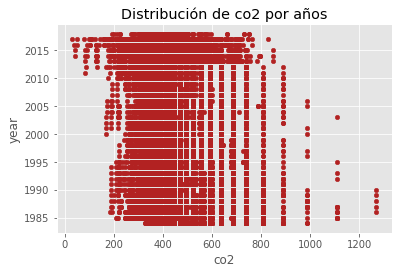

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

antiguedad.plot(
    x    = "co2",
    y    = "year",
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de co2 por años');

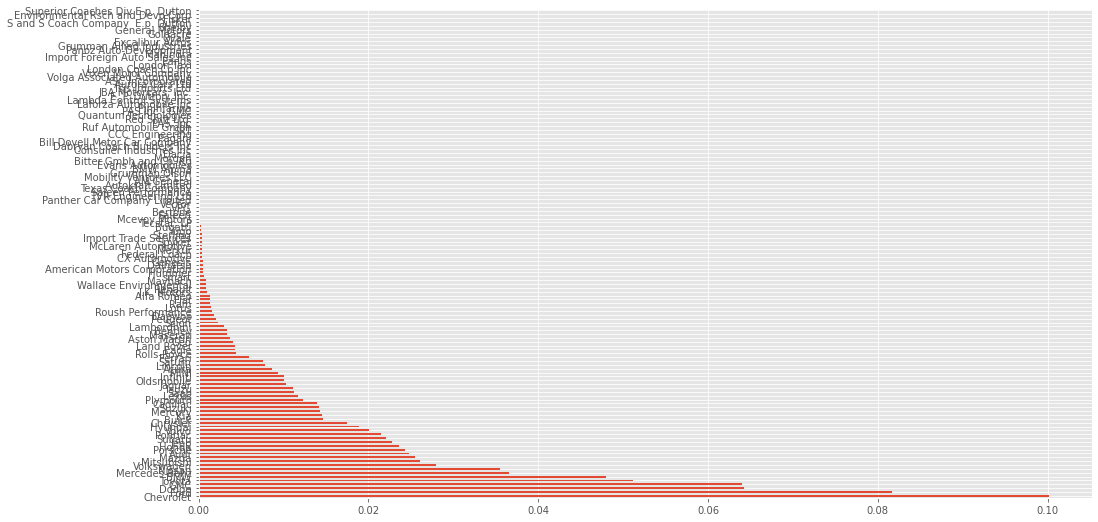

In [98]:

cars.make.value_counts(normalize=True)

#plot the bar graph
cars.make.value_counts(normalize=True).plot.barh()
plt.show()

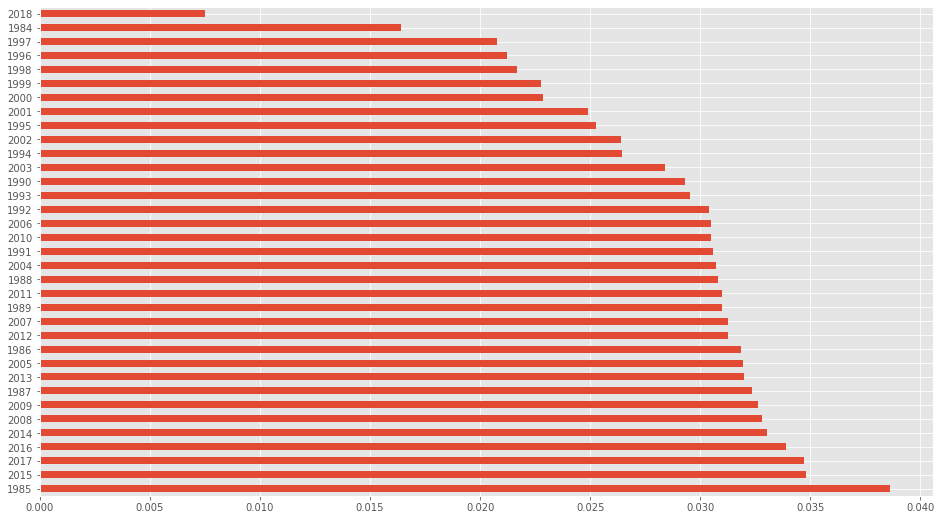

In [99]:
cars.year.value_counts(normalize=True)

#plot the bar graph
cars.year.value_counts(normalize=True).plot.barh()
plt.show()

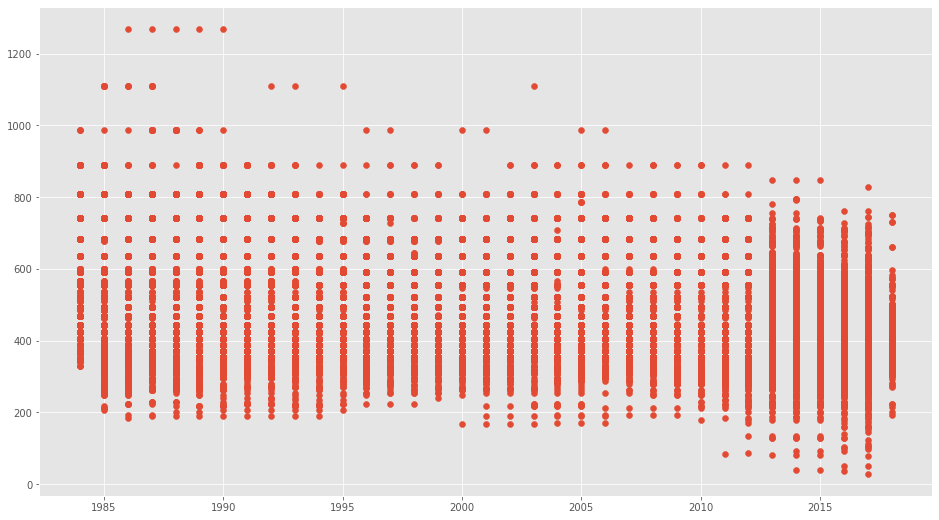

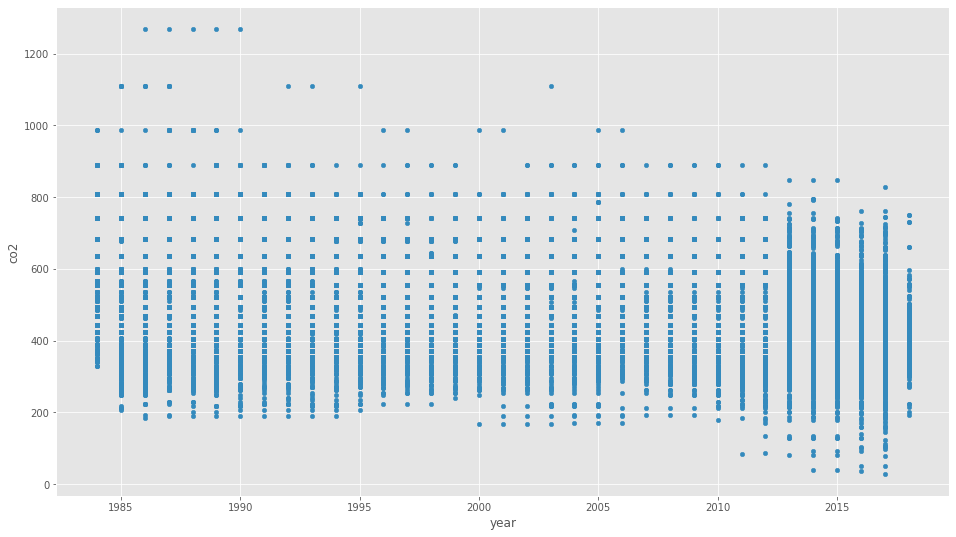

In [102]:
#plot the scatter plot
plt.scatter(cars.year,cars.co2)
plt.show()

#plot the scatter plot of balance and age variable in data
cars.plot.scatter(x="year",y="co2")
plt.show()

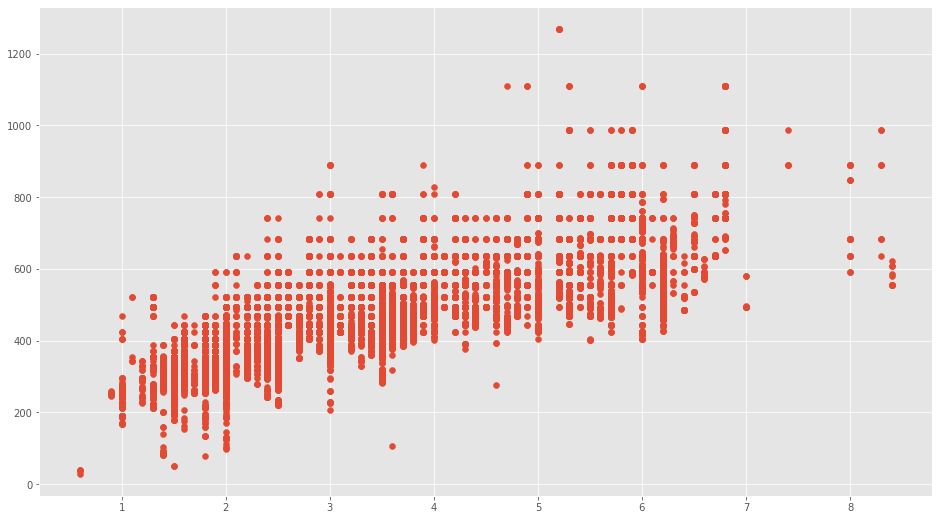

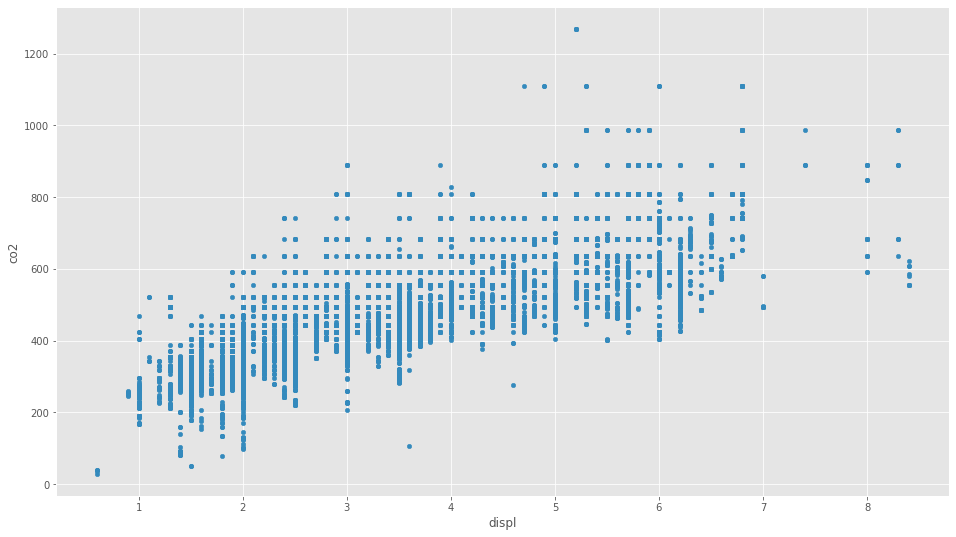

In [103]:
#plot the scatter plot
plt.scatter(cars.displ,cars.co2)
plt.show()

#plot the scatter plot of balance and age variable in data
cars.plot.scatter(x="displ",y="co2")
plt.show()

In [105]:
cars.groupby(["make", "year"]).mean()

displ  cylinders       comb         co2  comb_inv
make             year                                                      
AM General       1984  3.350000   5.000000  15.000000  603.190045  0.067873
                 1985  3.350000   5.000000  14.500000  619.526442  0.069712
ASC Incorporated 1987  3.800000   6.000000  16.000000  555.437500  0.062500
Acura            1986  2.050000   5.000000  22.000000  409.464627  0.046075
                 1987  2.266667   5.333333  20.833333  433.219596  0.048748
...                         ...        ...        ...         ...       ...
smart            2013  1.000000   3.000000  36.000000  244.000000  0.027778
                 2014  1.000000   3.000000  36.000000  243.000000  0.027778
                 2015  1.000000   3.000000  36.000000  244.000000  0.027778
                 2016  0.900000   3.000000  34.500000  250.500000  0.028992
                 2017  0.900000   3.000000  34.500000  253.500000  0.028992

[1618 rows x 5 columns]

In [106]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.3 MB/s 


In [109]:
import sweetviz as sv
report = sv.analyze(cars, target_feat = "co2")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
